In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
student = pd.read_csv('/workspaces/dfproj-fa24/student-lpor.csv')
student_numerical = pd.read_csv('/workspaces/dfproj-fa24/en_lpor_classification.csv')

Step 1: EDA

In [4]:
student.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2'],
      dtype='object')

In [5]:
pd.options.display.max_columns = None
student.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13


In [6]:
student_numerical.head(5)

,School,Gender,Age,Housing_Type,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Work,Father_Work,Reason_School_Choice,Legal_Responsibility,Commute_Time,Weekly_Study_Time,Extra_Educational_Support,Parental_Educational_Support,Private_Tutoring,Extracurricular_Activities,Attended_Daycare,Desire_Graduate_Education,Has_Internet,Is_Dating,Good_Family_Relationship,Free_Time_After_School,Time_with_Friends,Alcohol_Weekdays,Alcohol_Weekends,Health_Status,School_Absence,Grade_1st_Semester,Grade_2nd_Semester
0,0,1,18,0,1,1,4,4,3,0,2,0,2,2,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,11
1,0,1,17,0,1,0,1,1,3,4,2,1,1,2,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,9,11
2,0,1,15,0,0,0,1,1,3,4,3,0,1,2,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,13
3,0,1,15,0,1,0,4,2,1,2,0,0,1,3,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14
4,0,1,16,0,1,0,3,3,4,4,0,1,1,2,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,11,13


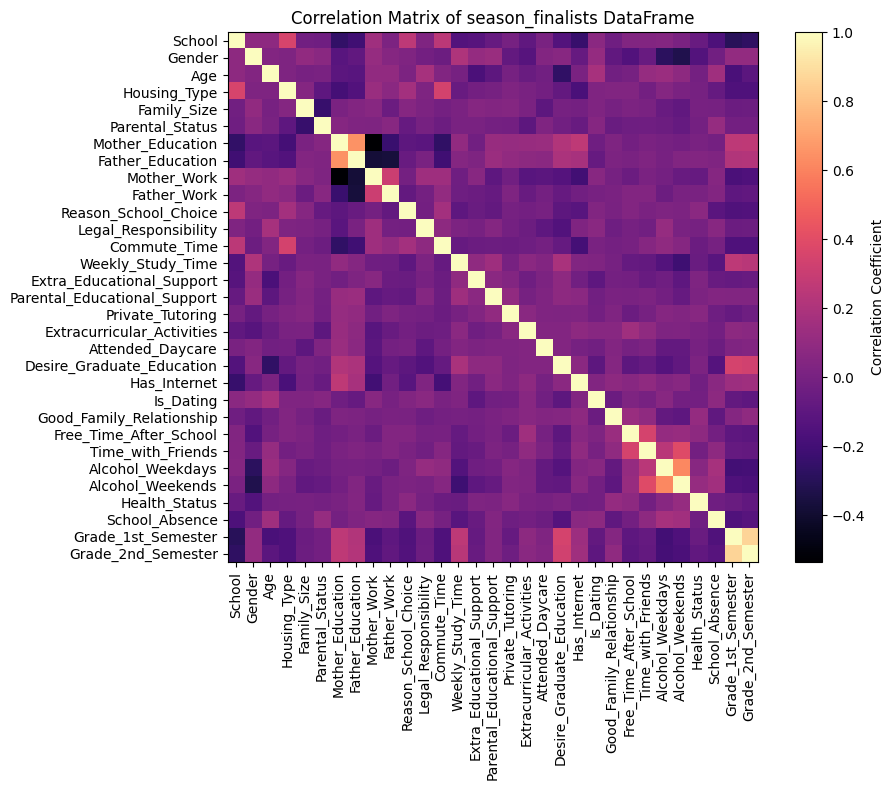

In [7]:
correlation_matrix = student_numerical.corr()
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='magma', interpolation='nearest')
plt.colorbar(label='Correlation Coefficient')
plt.title('Correlation Matrix of season_finalists DataFrame')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.tight_layout()
plt.show()

In [8]:
student_numerical.corr()

,School,Gender,Age,Housing_Type,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Work,Father_Work,Reason_School_Choice,Legal_Responsibility,Commute_Time,Weekly_Study_Time,Extra_Educational_Support,Parental_Educational_Support,Private_Tutoring,Extracurricular_Activities,Attended_Daycare,Desire_Graduate_Education,Has_Internet,Is_Dating,Good_Family_Relationship,Free_Time_After_School,Time_with_Friends,Alcohol_Weekdays,Alcohol_Weekends,Health_Status,School_Absence,Grade_1st_Semester,Grade_2nd_Semester
School,1.000000,0.083050,0.087170,0.354520,-0.022252,-0.028120,-0.254787,-0.209806,0.151608,0.018211,0.257056,0.033364,0.252936,-0.137857,-0.123340,-0.063720,-0.007905,-0.088604,0.004659,-0.136112,-0.240486,0.072241,-0.031597,0.034666,0.044632,0.047169,0.014169,-0.058599,-0.163933,-0.292626,-0.269776
Gender,0.083050,1.000000,0.043662,0.025503,0.098205,0.064700,-0.119127,-0.083913,0.114223,0.054325,0.028519,-0.019301,-0.040880,0.206214,0.111202,0.129467,-0.079300,-0.124707,0.043603,0.058134,-0.065911,0.110144,-0.083473,-0.146305,-0.058178,-0.282696,-0.320785,-0.139547,-0.021336,0.104109,0.104005
Age,0.087170,0.043662,1.000000,0.025848,0.002470,0.005631,-0.107832,-0.121050,0.096202,0.094789,0.017911,0.171760,0.034490,-0.008415,-0.167841,-0.101894,-0.005458,-0.054279,-0.021441,-0.265497,0.013115,0.178810,-0.020559,-0.004910,0.112805,0.134768,0.086357,-0.008750,0.149998,-0.174322,-0.107119
Housing_Type,0.354520,0.025503,0.025848,1.000000,0.046113,-0.094635,-0.190320,-0.141493,0.128512,0.069587,0.163674,0.026165,0.344902,-0.062023,-0.017956,-0.005577,0.030483,0.009278,-0.018077,-0.076706,-0.175794,0.030939,0.033897,0.036647,-0.015475,0.047304,0.012416,-0.003787,-0.073653,-0.157127,-0.154600
Family_Size,-0.022252,0.098205,0.002470,0.046113,1.000000,-0.239608,0.014325,0.039538,0.059604,-0.045834,0.055543,0.019892,-0.012794,0.010945,0.056405,0.039819,0.050253,0.014790,-0.100686,-0.004523,-0.013357,0.032936,-0.004641,0.021257,0.004312,-0.060482,-0.081958,-0.002448,-0.004645,-0.047230,-0.038891
Parental_Status,-0.028120,0.064700,0.005631,-0.094635,-0.239608,1.000000,0.057174,0.031856,0.025812,0.057947,-0.065814,-0.007587,-0.040633,0.008748,0.009456,-0.010203,-0.015923,-0.101555,0.032724,-0.022726,-0.059754,0.053828,-0.051303,-0.037585,-0.031086,-0.041513,-0.070976,-0.012638,0.117492,-0.015251,-0.018689
Mother_Education,-0.254787,-0.119127,-0.107832,-0.190320,0.014325,0.057174,1.000000,0.647477,-0.536829,-0.236021,-0.100401,-0.111274,-0.265079,0.097006,-0.022168,0.120491,0.113973,0.119354,0.125951,0.213896,0.266052,-0.030992,0.024421,-0.019686,0.009536,-0.007018,-0.019766,0.004614,-0.008577,0.260472,0.264035
Father_Education,-0.209806,-0.083913,-0.121050,-0.141493,0.039538,0.031856,0.647477,1.000000,-0.376360,-0.363574,-0.060966,0.006902,-0.208288,0.050400,0.023572,0.135191,0.094628,0.079700,0.074863,0.191735,0.183483,-0.067675,0.020256,0.006841,0.027690,0.000061,0.038445,0.044910,0.029859,0.217501,0.225139
Mother_Work,0.151608,0.114223,0.096202,0.128512,0.059604,0.025812,-0.536829,-0.376360,1.000000,0.313979,-0.014290,0.146910,0.143728,-0.027832,0.063127,-0.092705,-0.022049,-0.118474,-0.107690,-0.134293,-0.206238,0.059196,-0.002603,-0.045453,0.012780,-0.011831,-0.059446,-0.067353,0.054078,-0.169317,-0.158552
Father_Work,0.018211,0.054325,0.094789,0.069587,-0.045834,0.057947,-0.236021,-0.363574,0.313979,1.000000,-0.074679,-0.009709,0.102847,-0.037830,-0.046903,-0.063976,0.027030,-0.057043,-0.011730,-0.064027,-0.022623,0.003189,0.013539,0.040034,0.039938,-0.039808,0.006927,0.008617,0.041174,-0.093530,-0.085288


Creating a New Column, Average_grade, which is the average of the student's grade in the 1st and 2nd semester. 

In [16]:
average_grade = ((student['G1'].values + student['G2'].values)/2).round().astype(int)
student_numerical['Average_grade'] = average_grade
student_numerical = student_numerical.drop(columns=['Grade_1st_Semester', 'Grade_2nd_Semester'])


KeyError: "['Grade_1st_Semester', 'Grade_2nd_Semester'] not found in axis"

In [17]:
student_numerical.corr()

,School,Gender,Age,Housing_Type,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Work,Father_Work,Reason_School_Choice,Legal_Responsibility,Commute_Time,Weekly_Study_Time,Extra_Educational_Support,Parental_Educational_Support,Private_Tutoring,Extracurricular_Activities,Attended_Daycare,Desire_Graduate_Education,Has_Internet,Is_Dating,Good_Family_Relationship,Free_Time_After_School,Time_with_Friends,Alcohol_Weekdays,Alcohol_Weekends,Health_Status,School_Absence,Average_grade
School,1.000000,0.083050,0.087170,0.354520,-0.022252,-0.028120,-0.254787,-0.209806,0.151608,0.018211,0.257056,0.033364,0.252936,-0.137857,-0.123340,-0.063720,-0.007905,-0.088604,0.004659,-0.136112,-0.240486,0.072241,-0.031597,0.034666,0.044632,0.047169,0.014169,-0.058599,-0.163933,-0.294151
Gender,0.083050,1.000000,0.043662,0.025503,0.098205,0.064700,-0.119127,-0.083913,0.114223,0.054325,0.028519,-0.019301,-0.040880,0.206214,0.111202,0.129467,-0.079300,-0.124707,0.043603,0.058134,-0.065911,0.110144,-0.083473,-0.146305,-0.058178,-0.282696,-0.320785,-0.139547,-0.021336,0.102251
Age,0.087170,0.043662,1.000000,0.025848,0.002470,0.005631,-0.107832,-0.121050,0.096202,0.094789,0.017911,0.171760,0.034490,-0.008415,-0.167841,-0.101894,-0.005458,-0.054279,-0.021441,-0.265497,0.013115,0.178810,-0.020559,-0.004910,0.112805,0.134768,0.086357,-0.008750,0.149998,-0.140707
Housing_Type,0.354520,0.025503,0.025848,1.000000,0.046113,-0.094635,-0.190320,-0.141493,0.128512,0.069587,0.163674,0.026165,0.344902,-0.062023,-0.017956,-0.005577,0.030483,0.009278,-0.018077,-0.076706,-0.175794,0.030939,0.033897,0.036647,-0.015475,0.047304,0.012416,-0.003787,-0.073653,-0.161665
Family_Size,-0.022252,0.098205,0.002470,0.046113,1.000000,-0.239608,0.014325,0.039538,0.059604,-0.045834,0.055543,0.019892,-0.012794,0.010945,0.056405,0.039819,0.050253,0.014790,-0.100686,-0.004523,-0.013357,0.032936,-0.004641,0.021257,0.004312,-0.060482,-0.081958,-0.002448,-0.004645,-0.031617
Parental_Status,-0.028120,0.064700,0.005631,-0.094635,-0.239608,1.000000,0.057174,0.031856,0.025812,0.057947,-0.065814,-0.007587,-0.040633,0.008748,0.009456,-0.010203,-0.015923,-0.101555,0.032724,-0.022726,-0.059754,0.053828,-0.051303,-0.037585,-0.031086,-0.041513,-0.070976,-0.012638,0.117492,-0.025737
Mother_Education,-0.254787,-0.119127,-0.107832,-0.190320,0.014325,0.057174,1.000000,0.647477,-0.536829,-0.236021,-0.100401,-0.111274,-0.265079,0.097006,-0.022168,0.120491,0.113973,0.119354,0.125951,0.213896,0.266052,-0.030992,0.024421,-0.019686,0.009536,-0.007018,-0.019766,0.004614,-0.008577,0.269258
Father_Education,-0.209806,-0.083913,-0.121050,-0.141493,0.039538,0.031856,0.647477,1.000000,-0.376360,-0.363574,-0.060966,0.006902,-0.208288,0.050400,0.023572,0.135191,0.094628,0.079700,0.074863,0.191735,0.183483,-0.067675,0.020256,0.006841,0.027690,0.000061,0.038445,0.044910,0.029859,0.222094
Mother_Work,0.151608,0.114223,0.096202,0.128512,0.059604,0.025812,-0.536829,-0.376360,1.000000,0.313979,-0.014290,0.146910,0.143728,-0.027832,0.063127,-0.092705,-0.022049,-0.118474,-0.107690,-0.134293,-0.206238,0.059196,-0.002603,-0.045453,0.012780,-0.011831,-0.059446,-0.067353,0.054078,-0.165624
Father_Work,0.018211,0.054325,0.094789,0.069587,-0.045834,0.057947,-0.236021,-0.363574,0.313979,1.000000,-0.074679,-0.009709,0.102847,-0.037830,-0.046903,-0.063976,0.027030,-0.057043,-0.011730,-0.064027,-0.022623,0.003189,0.013539,0.040034,0.039938,-0.039808,0.006927,0.008617,0.041174,-0.091737


Step 2: Splitting the data into training and testing sets
#features removed to correct overftting - 'Commute_Time', 'School_Absence', , 'Alcohol_Weekdays', 'Alcohol_Weekends'

'Mother_Education', 'Father_Education','Weekly_Study_Time', 'Desire_Graduate_Education'

In [41]:
X = student_numerical[['Commute_Time','Mother_Education', 'Father_Education','Weekly_Study_Time', 'Desire_Graduate_Education','Alcohol_Weekdays', 'Alcohol_Weekends']]
y = student_numerical['Average_grade'].values

X_train,X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

Step 3: Fitting the linear regression model

In [42]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)


LinearRegression()

Step 4: Making predictions using the model

In [43]:
y_pred = lin_model.predict(X_test)
y_train_pred = lin_model.predict(X_train)


Step 5: Checking for error, using Linear Regression error loss functions (r^2 and RMSE)

In [44]:
trainingr2 = r2_score(y_train, y_train_pred)
print("Training R^2: " + str(trainingr2))
r2 = r2_score(y_test, y_pred) 
print("R^2: " + str(r2))
rmse = (mean_squared_error(y_test, y_pred))**(1/2)
print("RMSE: " + str(rmse))

Training R^2: 0.2385975027402676
R^2: 0.10760390460640912
RMSE: 2.7986495098374444


training R^2 is a lot greater than our predicted R^2, so that means we are overfitting

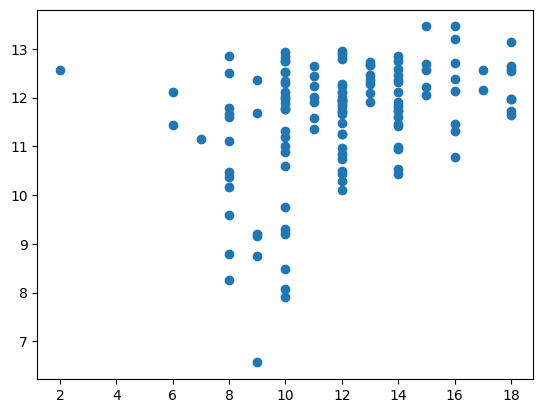

In [45]:
plt.scatter(y_test, y_pred)